In [36]:
#using CUDA
push!(LOAD_PATH,"../../../package/QuantumCircuits_demo_32/src","../../../package/VQC_demo_cuda/src")
using VQC
using QuantumCircuits, QuantumCircuits.Gates
using Flux.Optimise:ADAM,update!
using Zygote
using Random
include("ElementOp.jl")
using DelimitedFiles
using Statistics 
using StatsBase
using JLD2
using FileIO
using Dates
using Plots

In [2]:
P=[0.01,0.02,0.03,0.04,0.05,0.06,0.08,0.10,0.12,0.14,0.16,0.18];
# acc= readdlm("Ada_Amp_data/new_ada_2/0.01_ada3_amplitude_cu_acc_c10s10.csv")

12-element Vector{Float64}:
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.08
 0.1
 0.12
 0.14
 0.16
 0.18

In [34]:
re=load("Ada_Amp_data/new_ada_2/0.01_ada3_amp_dm_cu_c&a.jld2")

Dict{String, Any} with 20 entries:
  "alphas8"    => [2.61663, 1.84228, 1.91541, 1.95131, 1.73543, 1.47076, 1.3949…
  "circuits10" => QCircuit[QCircuit(Union{QuantumCircuits.QuantumCircuit, Abstr…
  "alphas1"    => [3.07832, 2.24369, 1.70075, 1.84941, 2.0088, 1.78998, 1.58552…
  "circuits4"  => QCircuit[QCircuit(Union{QuantumCircuits.QuantumCircuit, Abstr…
  "circuits6"  => QCircuit[QCircuit(Union{QuantumCircuits.QuantumCircuit, Abstr…
  "alphas7"    => [2.58612, 1.92387, 1.89574, 1.75849, 1.85572, 1.91818, 1.7791…
  "circuits7"  => QCircuit[QCircuit(Union{QuantumCircuits.QuantumCircuit, Abstr…
  "circuits3"  => QCircuit[QCircuit(Union{QuantumCircuits.QuantumCircuit, Abstr…
  "alphas4"    => [3.08442, 2.20441, 1.93224, 1.73248, 1.63629, 1.71486, 1.3940…
  "circuits2"  => QCircuit[QCircuit(Union{QuantumCircuits.QuantumCircuit, Abstr…
  "circuits5"  => QCircuit[QCircuit(Union{QuantumCircuits.QuantumCircuit, Abstr…
  "alphas5"    => [3.08442, 2.19636, 1.7434, 1.48269, 1.69156, 1.66912, 1.

In [35]:
circuits=re["circuits1"];
circuit=circuits[1]

QCircuit(Union{QuantumCircuits.QuantumCircuit, AbstractQuantumMap, Gate}[RxGate{Float64}((1,), [1.5372688378987012], Bool[1]), RzGate{Float64}((1,), [1.6159719473498133], Bool[1]), RxGate{Float64}((1,), [1.5411122615488648], Bool[1]), RxGate{Float64}((2,), [1.355437485201672], Bool[1]), RzGate{Float64}((2,), [1.5065271206482167], Bool[1]), RxGate{Float64}((2,), [1.5681292870129502], Bool[1]), RxGate{Float64}((3,), [1.4126027718301504], Bool[1]), RzGate{Float64}((3,), [1.508285155702447], Bool[1]), RxGate{Float64}((3,), [1.4272233045863028], Bool[1]), RxGate{Float64}((4,), [-0.09071548613900929], Bool[1])  …  QuantumMap{1, ComplexF64}((5,), Matrix{ComplexF64}[[0.9962429422585638 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.9962429422585638 + 0.0im], [0.0 + 0.0im 0.05 + 0.0im; 0.05 + 0.0im 0.0 + 0.0im], [0.0 + 0.0im 0.0 - 0.05im; 0.0 + 0.05im 0.0 + 0.0im], [0.05 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im -0.05 + 0.0im]], (5,), ComplexF64[0.995 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.005000000000000001 + 0.0im; 0.

In [24]:
acc=readdlm("random_amp_data/random3/0.01_ada3_amplitude_cu_acc_c50s1.csv")

2×50 Matrix{Float64}:
 0.863076  0.827385  0.867618  0.86697   …  0.882544  0.881895  0.881246
 0.823691  0.819559  0.848485  0.858127     0.871901  0.873278  0.871901

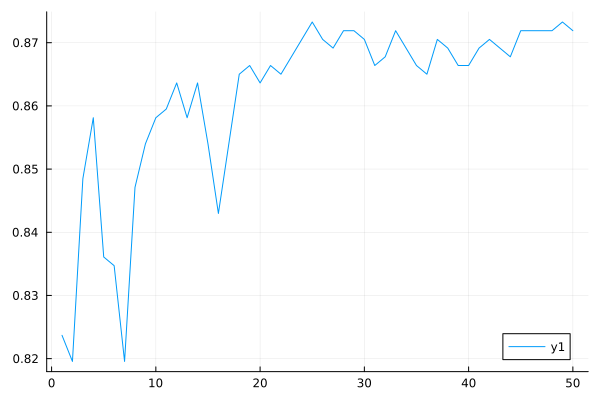

In [25]:
plot(acc[2,:])

In [20]:
test_acc=zeros(5,10,12)
for i in 1:length(P)
    acc=readdlm("Ada_Amp_data/new_ada_3_5/$(P[i])_ada3_amplitude_cu_acc_c10s5.csv")
    test_acc[:,:,i]=acc[6:10,:]
end

In [21]:
average=reshape(mean(test_acc,dims=1),10,12)

10×12 Matrix{Float64}:
 0.893651  0.799873  0.781     0.786602  …  0.629861  0.608202  0.583105
 0.912025  0.864567  0.836614  0.851264     0.53992   0.555817  0.551407
 0.941445  0.925036  0.915244  0.88963      0.762556  0.776997  0.748753
 0.938479  0.912794  0.925995  0.896985     0.517396  0.669558  0.68394
 0.931634  0.934893  0.911493  0.911678     0.583045  0.683333  0.679508
 0.938007  0.924933  0.933491  0.938693  …  0.624071  0.681762  0.6696
 0.942012  0.934321  0.931079  0.932474     0.668651  0.677219  0.727857
 0.939173  0.931502  0.935221  0.943191     0.687206  0.730004  0.745879
 0.944929  0.939221  0.931454  0.920494     0.695815  0.73091   0.747238
 0.950409  0.933642  0.922271  0.937372     0.698235  0.775538  0.794715

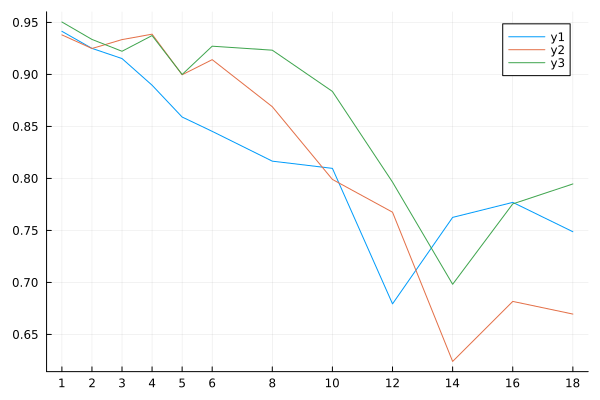

In [22]:
plot(P.*100,[average[3,:],average[6,:],average[10,:]],xticks=P.*100)

In [34]:
test_acc8=readdlm("Ada_Amp_data/new_ada_2/0.08_ada3_amplitude_cu_acc_c10s10.csv")[11:20,:]

10×10 Matrix{Float64}:
 0.75146   0.76963   0.765088  0.787151  …  0.857236  0.931862  0.930565
 0.719008  0.710744  0.714876  0.727273     0.81405   0.913223  0.900826
 0.732641  0.523686  0.821544  0.84231      0.93965   0.934458  0.938352
 0.703857  0.520661  0.793388  0.798898     0.900826  0.915978  0.914601
 0.693705  0.548994  0.584036  0.791694     0.830629  0.863076  0.85464
 0.677686  0.495868  0.557851  0.713499  …  0.77686   0.827824  0.826446
 0.732641  0.509409  0.841012  0.826736     0.925373  0.931213  0.937054
 0.703857  0.508264  0.819559  0.797521     0.898072  0.907713  0.921488
 0.829981  0.867618  0.935107  0.861778     0.852693  0.870863  0.861778
 0.782369  0.833333  0.871901  0.831956     0.860882  0.885675  0.884298

In [39]:
mean(test_acc10,dims=1)

1×10 Matrix{Float64}:
 0.691344  0.507185  0.63865  0.549506  …  0.823625  0.844389  0.846708

In [40]:
test_acc10=test_acc[:,:,12]

10×10 Matrix{Float64}:
 0.681376  0.397145  0.414666  0.425049  …  0.588579  0.693705  0.58209
 0.626722  0.373278  0.410468  0.414601     0.539945  0.636364  0.5427
 0.680727  0.471772  0.438676  0.421804     0.451655  0.589877  0.687216
 0.626722  0.475207  0.450413  0.440771     0.443526  0.544077  0.644628
 0.681376  0.473718  0.445814  0.432836     0.461389  0.709929  0.611291
 0.630854  0.480716  0.455923  0.446281  …  0.454545  0.698347  0.566116
 0.681376  0.473069  0.439325  0.427644     0.472421  0.473069  0.469825
 0.630854  0.482094  0.451791  0.440771     0.46281   0.46281   0.4573
 0.682674  0.473069  0.447761  0.428942     0.484101  0.478261  0.485399
 0.630854  0.482094  0.455923  0.443526     0.473829  0.482094  0.479339